Dataset shape: (167, 10)
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
Using the following numeric columns for clustering: ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


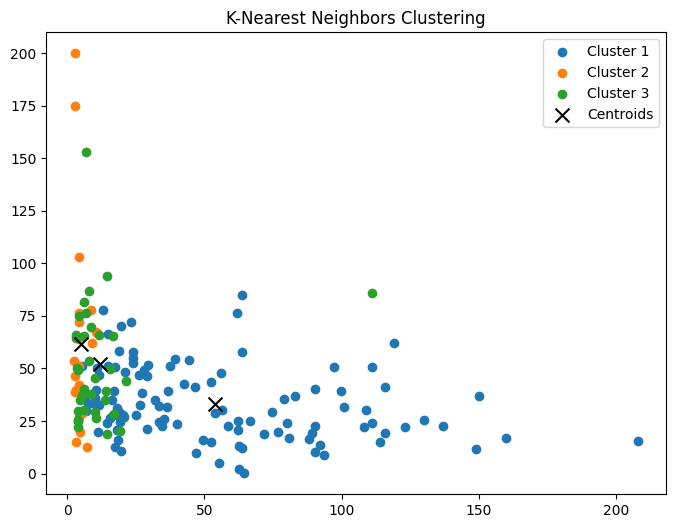

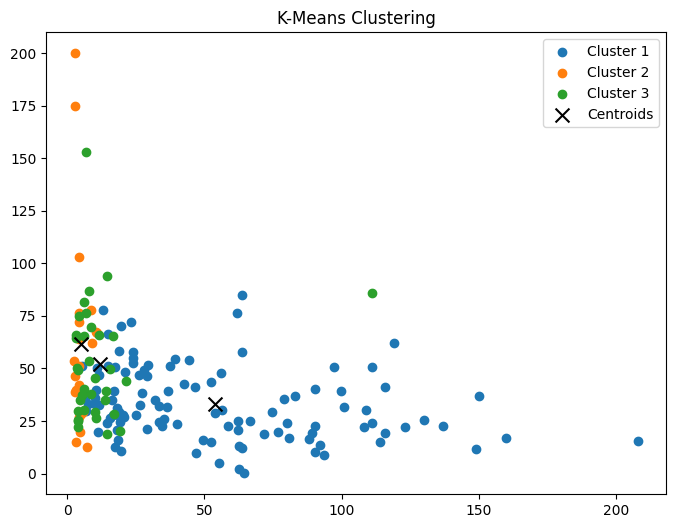

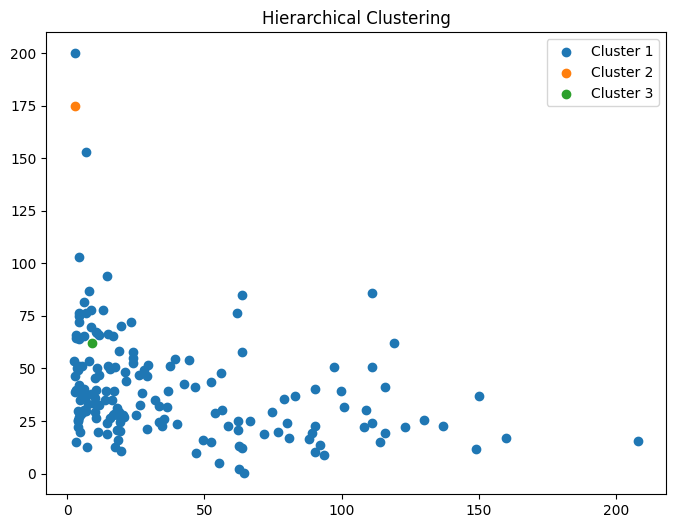

Evaluating KNN Clustering
Silhouette Score: 0.7386059788791108
Evaluating K-Means Clustering
Silhouette Score: 0.7386059788791108
Evaluating Hierarchical Clustering
Silhouette Score: nan


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


np.float64(nan)

In [5]:

  ### Step 1: Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset shape: {data.shape}")
        print(data.head())
        return data
    except FileNotFoundError:
        print(f"Error: The file at '{file_path}' was not found.")
        return None

# Provide the path to the dataset
data_path = '/Users/arnav/Downloads/data.csv'
data = load_data(data_path)

if data is None:
    raise FileNotFoundError("Please ensure the dataset is correctly placed and the file path is accurate.")

# Preprocess data: Ensure only numeric columns are used for clustering
numeric_data = data.select_dtypes(include=[np.number])
print(f"Using the following numeric columns for clustering: {numeric_data.columns.tolist()}")

### Step 2: K-Nearest Neighbors (KNN) Clustering

def calculate_euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_clustering(data, k):
    np.random.seed(42)
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])

    for _ in range(100):  # Maximum 100 iterations
        distances = np.array([[calculate_euclidean_distance(x, centroid) for centroid in centroids] for x in data.to_numpy()])
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data.to_numpy()[clusters == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

def plot_knn(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = data.to_numpy()[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.legend()
    plt.title('K-Nearest Neighbors Clustering')
    plt.show()

k = 3
clusters_knn, centroids_knn = knn_clustering(numeric_data, k)
plot_knn(numeric_data, clusters_knn, centroids_knn, k)

### Step 3: K-Means Clustering

def kmeans_clustering(data, k):
    np.random.seed(42)
    centroids = data.sample(n=k).to_numpy()
    clusters = np.zeros(data.shape[0])

    for _ in range(100):  # Maximum 100 iterations
        distances = np.array([[calculate_euclidean_distance(x, centroid) for centroid in centroids] for x in data.to_numpy()])
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data.to_numpy()[clusters == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return clusters, centroids

def plot_kmeans(data, clusters, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = data.to_numpy()[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.legend()
    plt.title('K-Means Clustering')
    plt.show()

k = 3
clusters_kmeans, centroids_kmeans = kmeans_clustering(numeric_data, k)
plot_kmeans(numeric_data, clusters_kmeans, centroids_kmeans, k)

### Step 4: Hierarchical Clustering

def hierarchical_clustering(data, k):
    distances = np.array([[calculate_euclidean_distance(x1, x2) for x2 in data.to_numpy()] for x1 in data.to_numpy()])
    np.fill_diagonal(distances, np.inf)
    clusters = {i: [i] for i in range(len(data))}

    while len(clusters) > k:
        min_dist = np.inf
        merge_clusters = None

        for i in clusters:
            for j in clusters:
                if i < j:
                    cluster_dist = np.min([distances[p1, p2] for p1 in clusters[i] for p2 in clusters[j]])
                    if cluster_dist < min_dist:
                        min_dist = cluster_dist
                        merge_clusters = (i, j)

        clusters[merge_clusters[0]].extend(clusters[merge_clusters[1]])
        del clusters[merge_clusters[1]]

        for point1 in clusters[merge_clusters[0]]:
            for point2 in clusters[merge_clusters[0]]:
                distances[point1, point2] = np.inf

    final_clusters = np.zeros(len(data))
    for cluster_id, points in enumerate(clusters.values()):
        for point in points:
            final_clusters[point] = cluster_id

    return final_clusters.astype(int)

def plot_hierarchical(data, clusters):
    plt.figure(figsize=(8, 6))
    for i in np.unique(clusters):
        cluster_points = data.to_numpy()[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')
    plt.legend()
    plt.title('Hierarchical Clustering')
    plt.show()

clusters_hierarchical = hierarchical_clustering(numeric_data, k)
plot_hierarchical(numeric_data, clusters_hierarchical)

### Step 5: Evaluation Metrics

def evaluate_clustering(data, clusters):
    silhouette_avg = 0
    for i, point in enumerate(data.to_numpy()):
        own_cluster = clusters[i]
        same_cluster = data.to_numpy()[clusters == own_cluster]
        other_clusters = data.to_numpy()[clusters != own_cluster]

        a = np.mean([calculate_euclidean_distance(point, p) for p in same_cluster if not np.array_equal(point, p)])
        b = np.min([np.mean([calculate_euclidean_distance(point, p) for p in other_clusters])])

        silhouette_avg += (b - a) / max(a, b)

    silhouette_avg /= len(data)
    print(f'Silhouette Score: {silhouette_avg}')
    return silhouette_avg

print("Evaluating KNN Clustering")
evaluate_clustering(numeric_data, clusters_knn)

print("Evaluating K-Means Clustering")
evaluate_clustering(numeric_data, clusters_kmeans)

print("Evaluating Hierarchical Clustering")
evaluate_clustering(numeric_data, clusters_hierarchical)



